# Bivariate: Numeric vs Time

In [2]:
require(tidyverse)
require(repr)
require(hrbrthemes)
require(scales)

In [3]:
#figure dimensions
options(repr.plot.width=16, repr.plot.height=8)

In [5]:
gdp <- read_csv("Datasets/GDP.csv")

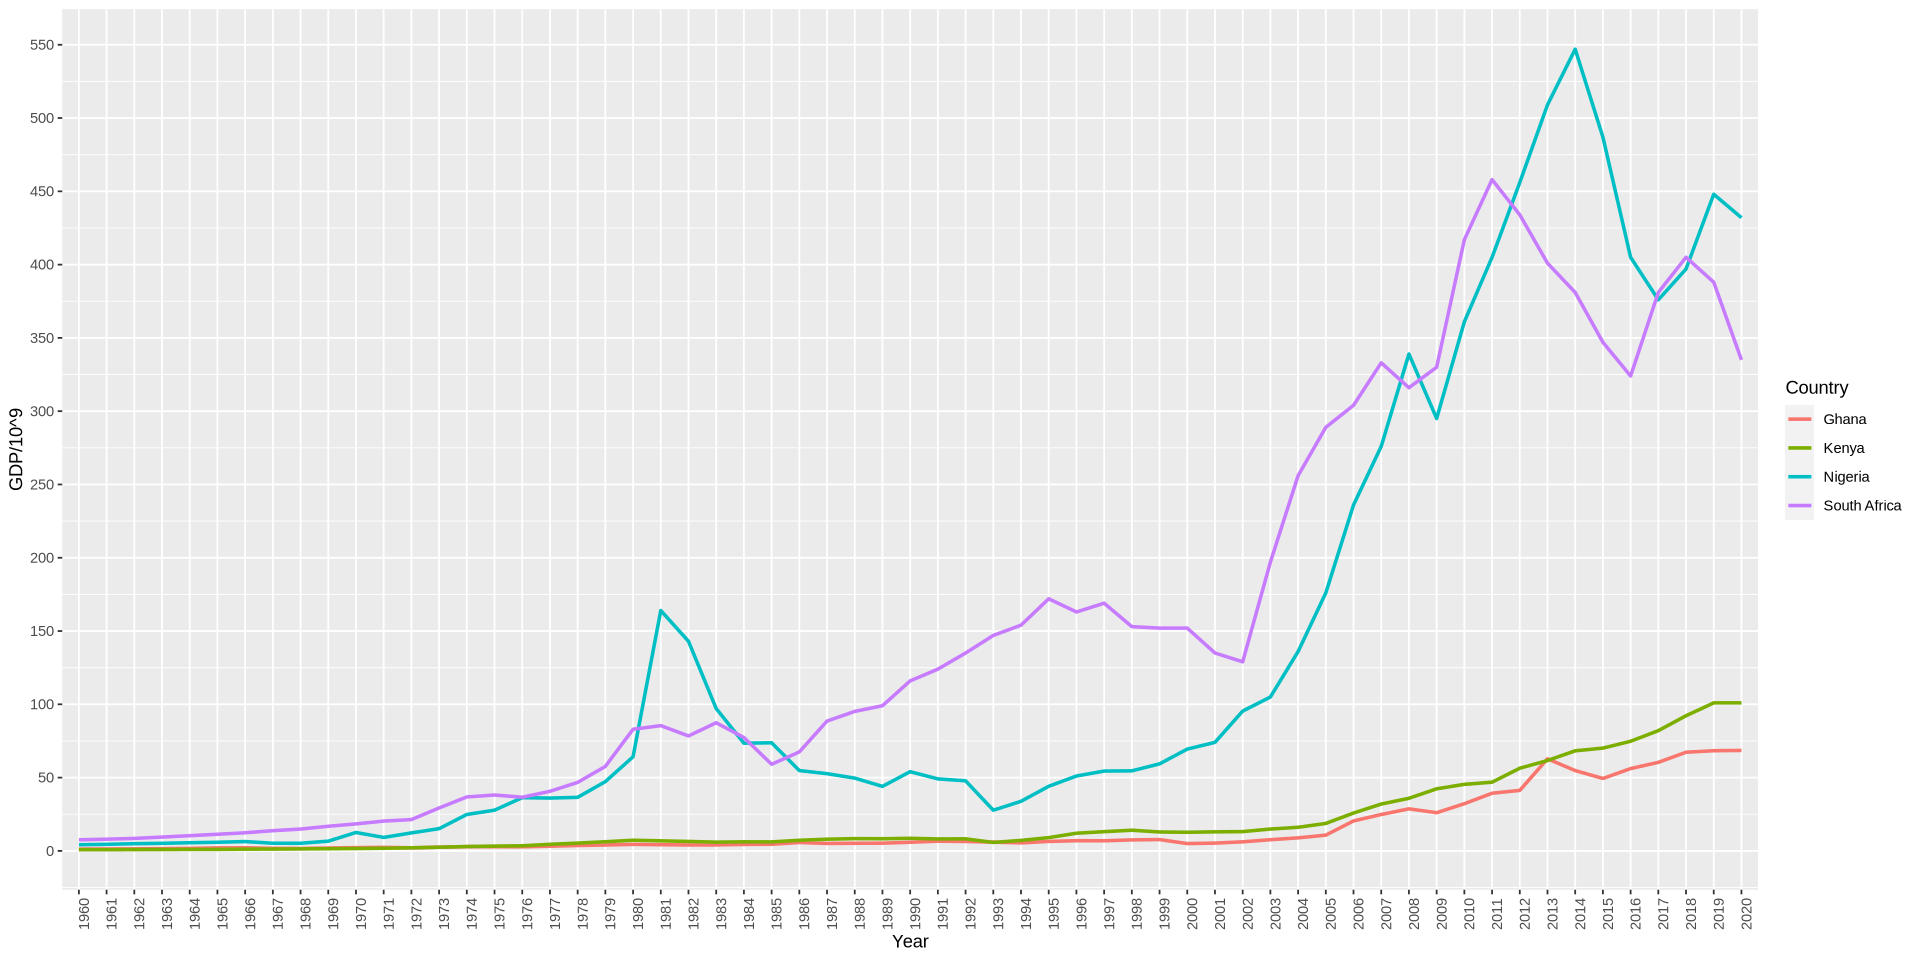

In [6]:
gdp %>% 
    rename(Country=`Country Name`) %>%
    pivot_longer(cols=as.character(1960:2020), names_to = 'Year', values_to = 'GDP') %>% 
    filter(Country %in% c('Nigeria', 'Ghana', 'Kenya', 'South Africa', 'Egypt')) %>% 
    ggplot() + 
        geom_line(aes(x=Year, y=GDP/10^9, group=Country, col=Country), lwd=1) + 
        #theme_ipsum() +
        theme(axis.text.x=element_text(angle=90)) + 
        scale_y_continuous(n.breaks = 10)

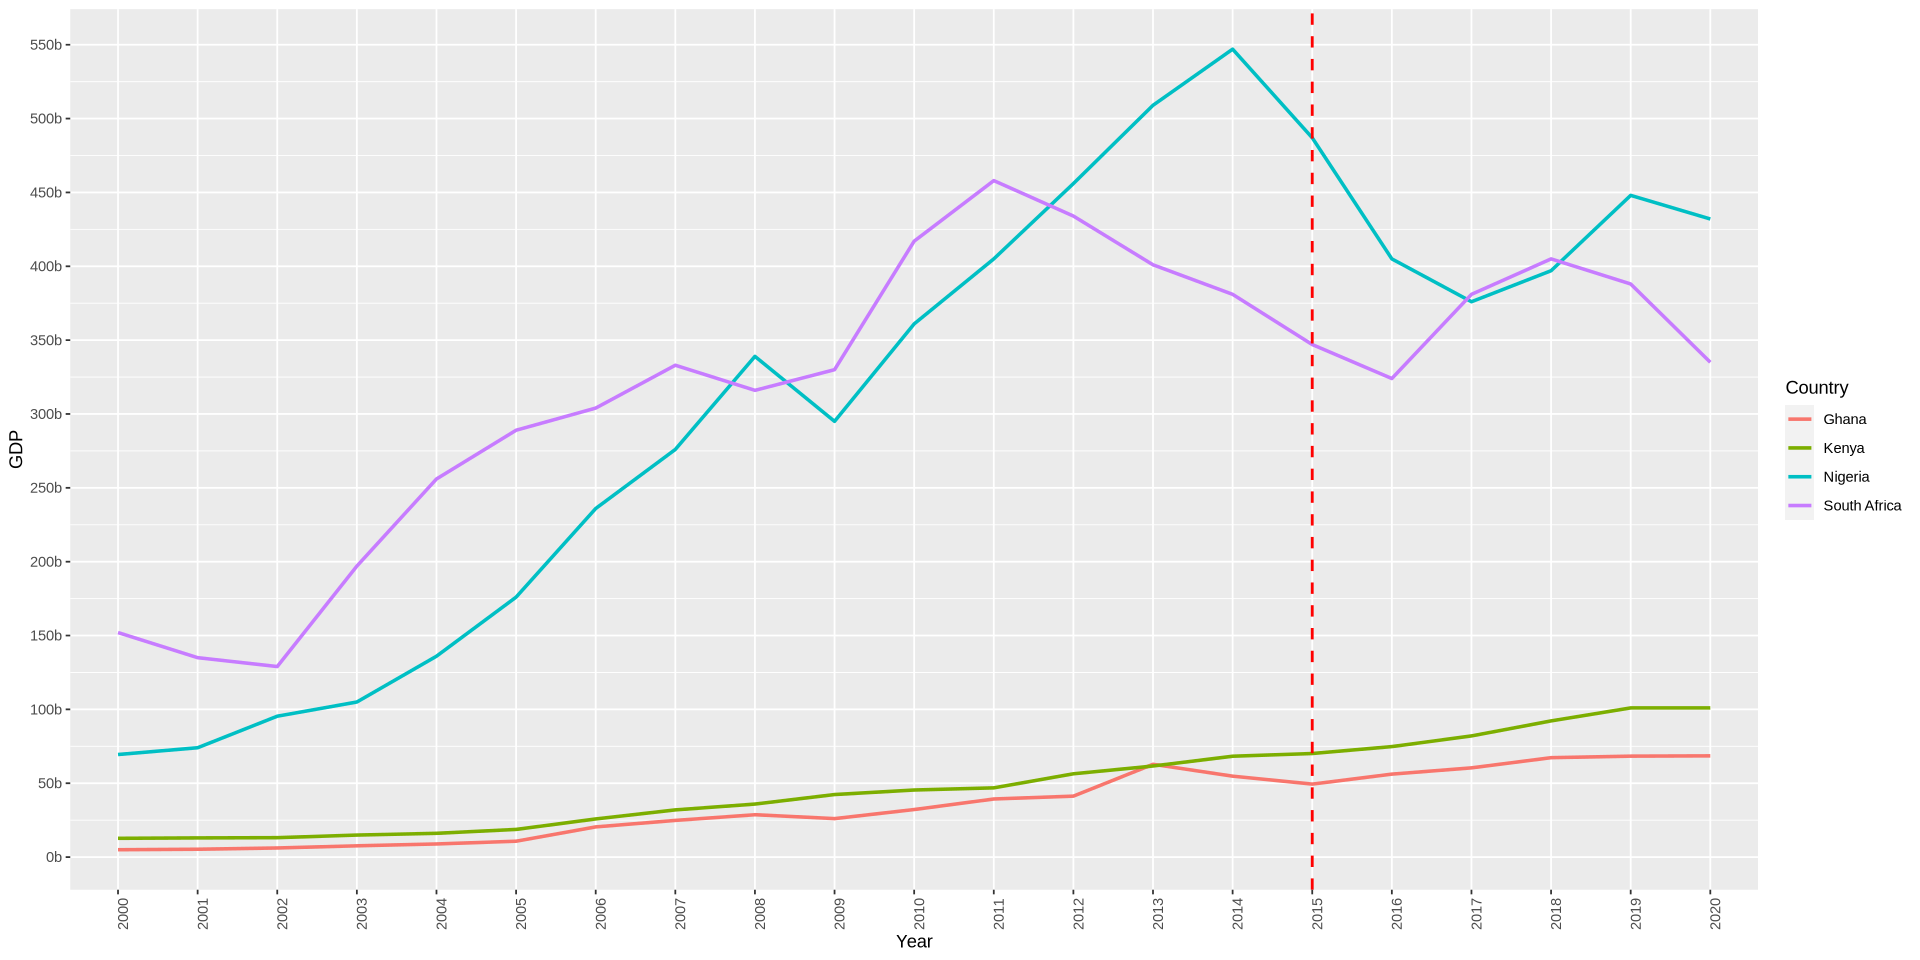

In [7]:
gdp %>% 
    rename(Country=`Country Name`) %>%
    pivot_longer(cols=as.character(1960:2020), names_to = 'Year', values_to = 'GDP') %>% 
    filter(Country %in% c('Nigeria', 'Ghana', 'Kenya', 'South Africa', 'Egypt')) %>% 
    filter(Year %in% as.character(2000:2020)) %>%
    ggplot() + 
        geom_line(aes(x=Year, y=GDP, group=Country, col=Country), lwd=1) + 
        theme(axis.text.x=element_text(angle=90)) + 
        geom_vline(xintercept = '2015', col='red', linetype='dashed', lwd=0.8) +
        scale_y_continuous(n.breaks = 10, labels=label_number(scale=1e-9, suffix='b')) 
        

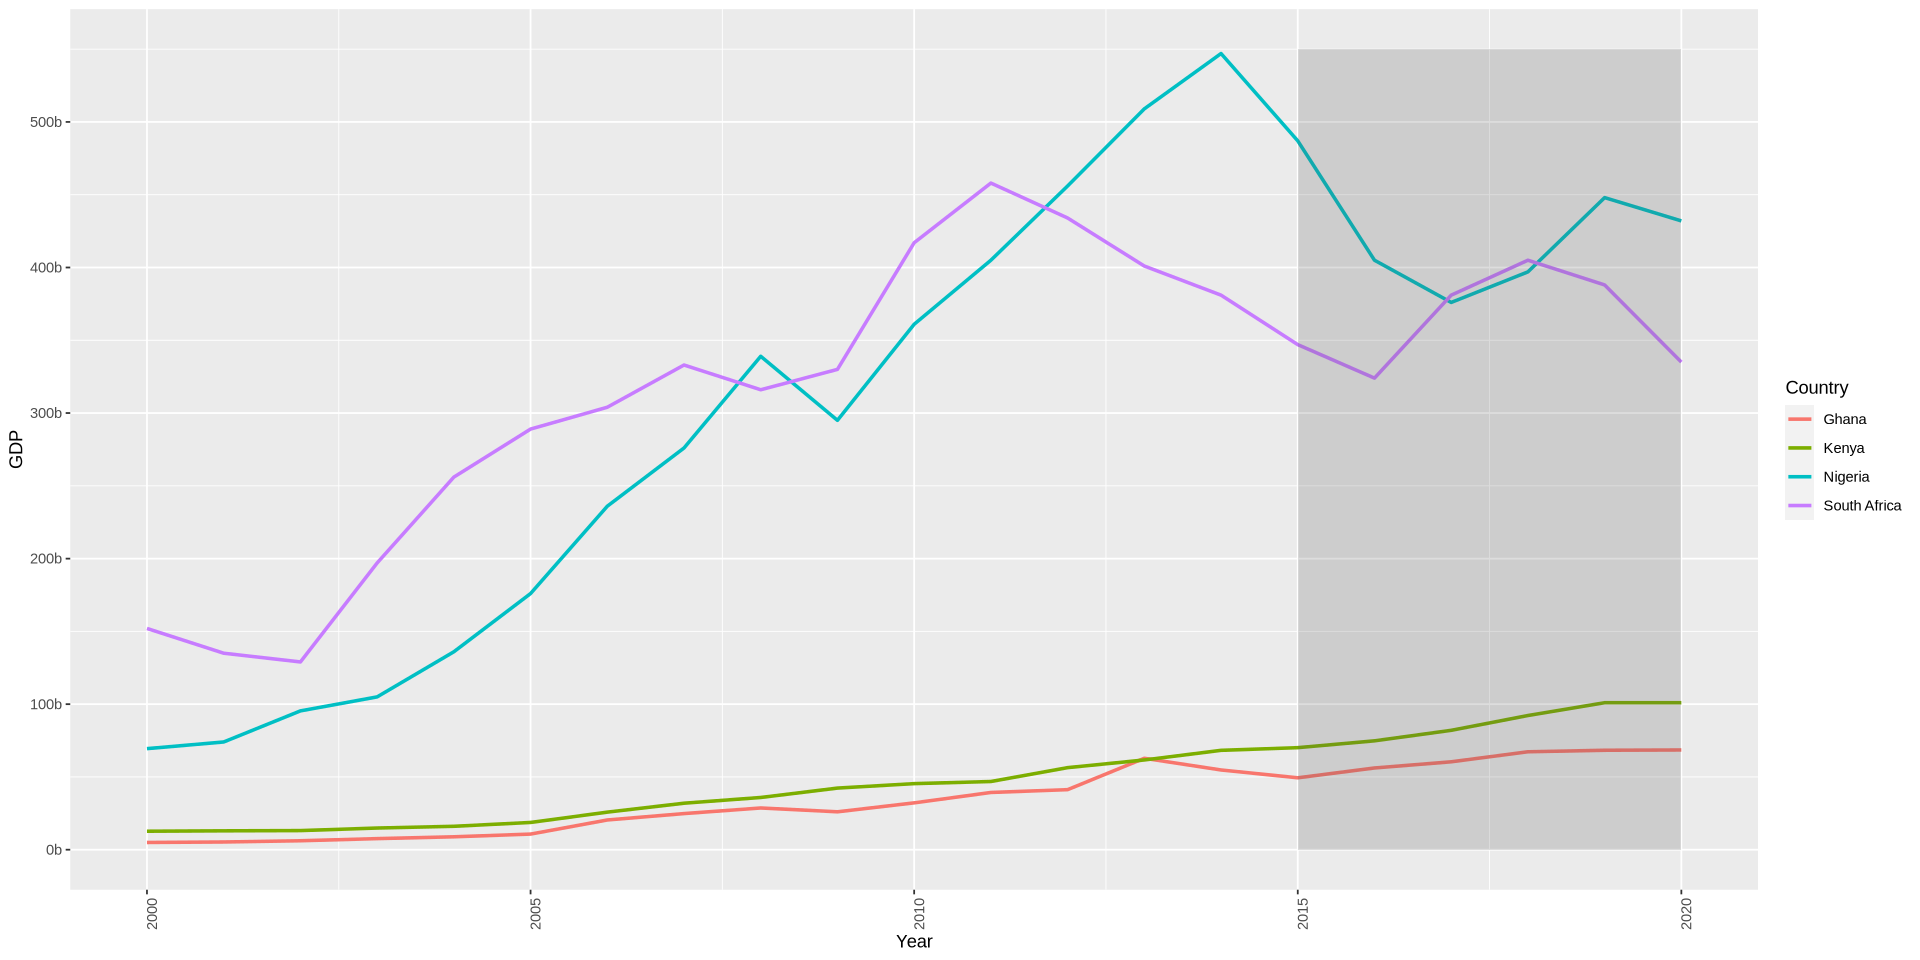

In [8]:
gdp %>% 
    rename(Country=`Country Name`) %>%
    pivot_longer(cols=as.character(1960:2020), names_to = 'Year', values_to = 'GDP') %>% 
    filter(Country %in% c('Nigeria', 'Ghana', 'Kenya', 'South Africa', 'Egypt')) %>% 
    filter(Year %in% as.character(2000:2020)) %>%
    ggplot() + 
        geom_line(aes(x=as.numeric(Year), y=GDP, group=Country, col=Country), lwd=1) + 
        theme(axis.text.x=element_text(angle=90)) + 
        annotate('rect', xmin=2015, xmax=2020, ymin=0, ymax=550*1e+9, alpha=.2) + 
        labs(x='Year') + 
        scale_y_continuous(n.breaks = 10, labels=label_number(scale=1e-9, suffix='b')) 